In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [57]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_AbJTz2l.csv")
sample = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv")


In [58]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [59]:
test.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1


In [60]:
sample.head(3)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000


In [61]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [62]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [65]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [66]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [67]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [68]:
train.Item_Identifier[:10]

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [69]:
test.Item_Identifier[:10]

0    FDW58
1    FDW14
2    NCN55
3    FDQ58
4    FDY38
5    FDH56
6    FDL48
7    FDC48
8    FDN33
9    FDA36
Name: Item_Identifier, dtype: object

In [70]:
train['source'] = 'train'
test['source'] = 'test'

In [71]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,train


In [72]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test


In [73]:
df = pd.concat([train,test])

In [74]:
df.shape

(14204, 13)

In [75]:
df.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
5679,FDJ26,15.3,Regular,0.00000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
5680,FDU37,9.5,Regular,0.10472,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [76]:
df['Item_Identifier'].nunique()

1559

In [77]:
df['Item_Identifier_2'] = df['Item_Identifier'].apply(lambda x:x[0:2])
df['Item_Identifier_3'] = df['Item_Identifier'].apply(lambda x:x[0:3])

In [78]:
df['Item_Identifier_2'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [79]:
df['Item_Identifier_3'].value_counts()

FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [80]:
del df['Item_Identifier_3']

In [81]:
df.shape

(14204, 14)

In [82]:
df['Item_Weight'].isna().sum()

2439

In [83]:
df.groupby(['Item_Identifier_2'])['Item_Weight'].mean()

Item_Identifier_2
DR    12.116645
FD    12.735577
NC    13.344139
Name: Item_Weight, dtype: float64

In [84]:
df['Item_Weight'] = df.groupby(['Item_Identifier_2']).Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [86]:
df['Item_Weight'].isna().sum()

0

In [87]:
df['Item_Fat_Content'].nunique()

5

In [88]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [89]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [90]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"Low Fat",
                                 "reg":"Regular",
                                 "low fat":"Low Fat"})

In [92]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

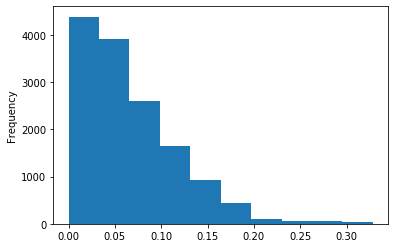

In [93]:
df['Item_Visibility'].plot(kind='hist')

In [94]:
df['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [95]:
df.sort_values(by =['Item_Identifier','Item_Visibility']).head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2
1197,DRA12,11.6,Low Fat,0.0,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,train,DR
1693,DRA12,11.6,Low Fat,0.0,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,train,DR


In [96]:
df.loc[df['Item_Visibility']==0.000000,'Item_Visibility'] = np.NAN

In [97]:
df['Item_Visibility'].isna().sum()

879

In [98]:
df['Item_Visibility'] = df.groupby(['Item_Identifier_2']).Item_Visibility.transform(lambda x:x.fillna(x.mean()))

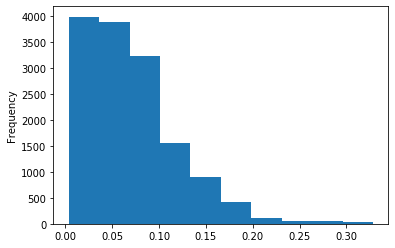

In [99]:
df['Item_Visibility'].plot(kind='hist')

In [100]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [101]:
df['Item_MRP'].isna().sum()

0

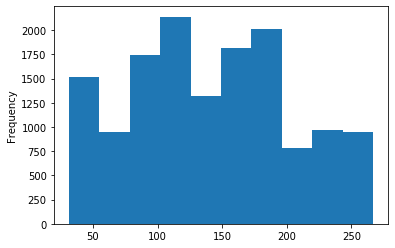

In [102]:
df['Item_MRP'].plot(kind='hist')

In [103]:
df['Item_MRP'].

SyntaxError: invalid syntax (<ipython-input-103-58e9f836d2a0>, line 1)

In [104]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [105]:
df['Outlet_Identifier'].isna().sum()

0

In [106]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [107]:
df['Outlet_Establishment_Year'].nunique()

9

In [108]:
df.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               1559
                           OUT019                880
1987                       OUT013               1553
1997                       OUT046               1550
1998                       OUT010                925
1999                       OUT049               1550
2002                       OUT045               1548
2004                       OUT035               1550
2007                       OUT017               1543
2009                       OUT018               1546
Name: Outlet_Identifier, dtype: int64

In [109]:
datetime.now().year,datetime.now().month

(2021, 3)

In [110]:
df['Outlet_age'] = datetime.now().year -df['Outlet_Establishment_Year']

In [111]:
df['Outlet_age'].value_counts()

36    2439
34    1553
22    1550
17    1550
24    1550
19    1548
12    1546
14    1543
23     925
Name: Outlet_age, dtype: int64

In [112]:
del df['Outlet_Establishment_Year']

In [113]:
df.tail(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2,Outlet_age
5679,FDJ26,15.3,Regular,0.072558,Canned,214.6218,OUT017,NaN,Tier 2,Supermarket Type1,NaN,test,FD,14
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,NaN,Tier 2,Supermarket Type1,NaN,test,FD,19


In [114]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [115]:
df['Outlet_Size'].isna().sum()

4016

In [116]:
df.groupby('Outlet_Identifier')['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [117]:

df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          1550
Tier 3                Medium         3105
                      High           1553
Name: Outlet_Size, dtype: int64

In [118]:
df.groupby(['Outlet_Location_Type','Outlet_Type']).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [ ]:
df[:2]

In [119]:
df['Outlet_Size'].mode()[0]

'Medium'

In [120]:
df['Outlet_Size'] = df.groupby('Outlet_Location_Type').Outlet_Size.transform(lambda x:x.fillna(x.mode()[0]))

In [121]:
df['Outlet_Size'].isna().sum()

0

In [122]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [123]:
df['Outlet_Type'].apply(lambda x:x.split()[0])[:5]

0    Supermarket
1    Supermarket
2    Supermarket
3        Grocery
4    Supermarket
Name: Outlet_Type, dtype: object

In [124]:
df['Outlet_Type_Category'] = df['Outlet_Type'].apply(lambda x:x.split()[0])

In [ ]:
df.head(2)

In [125]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_age
Item_Weight,1.000000,-0.016502,0.033206,0.011182,-0.000312
Item_Visibility,-0.016502,1.000000,-0.008853,-0.133754,0.088624
Item_MRP,0.033206,-0.008853,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011182,-0.133754,0.567574,1.000000,0.049135
Outlet_age,-0.000312,0.088624,-0.000141,0.049135,1.000000


In [ ]:
There is multi colinearity is bt  Item_Outlet_Sales and Item_MRP
Item_Outlet_Sales and Item_MRP

In [126]:
X = df.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales'])

In [ ]:
X.head(2)

In [127]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

In [128]:
vif_data

,Feature
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_age


In [129]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [ ]:
vif_data

In [130]:
 df.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_age'],
      dtype='object')

In [132]:
 df.select_dtypes(exclude=np.number).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source',
       'Item_Identifier_2', 'Outlet_Type_Category'],
      dtype='object')

In [ ]:
df_number_columns

In [ ]:
df.head(2)

In [ ]:
data_to_encode = df[df_category_columns].drop(columns=['Item_Identifier','Outlet_Identifier','source'])

In [ ]:
data_to_encode[:3]

In [ ]:
df_category_encoded = pd.get_dummies(data_to_encode)

In [ ]:
df_category_encoded

In [ ]:
df_final = pd.concat([df_category_encoded, df[df_number_columns], df[['Item_Identifier', 'Outlet_Identifier', 'source']]], axis = 1)


In [ ]:
df_final.head(2)

In [ ]:
train_processed = df_final[df_final['source'] == 'train']
test_processed = df_final[df_final['source'] == 'test']

In [ ]:
train_processed.shape,test_processed.shape

In [ ]:
del train_processed['source']

In [ ]:
del test_processed['source']

In [ ]:
test_processed.head(2)

In [ ]:
train_processed.head(2)

In [ ]:
train_X = train_processed.drop(columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [ ]:
test_X = test_processed.drop(columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [ ]:
train_y = train_processed['Item_Outlet_Sales']

In [ ]:
train_y[:5]

In [ ]:
sample.head(2)

## Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
lm = LinearRegression()
lm.fit(train_X,train_y)

In [ ]:
pred_train = lm.predict(train_X)

In [ ]:
pred_test = lm.predict(test_X)
pred_test = abs(pred_test)
print('MSE: ',mean_absolute_error(train_y,pred_train))

In [ ]:
import os
pwd = os.getcwd()
pwd

In [55]:
sample['Item_Outlet_Sales'] = pred_test

NameError: name 'pred_test' is not defined

In [ ]:
sample.head(2)

In [ ]:
#sample.to_csv('C:\\Users\\Lenovo\\Desktop\\Data_Science\\Inceptez\\December\\Machine_Learning\\Bigmart_Linear_Regression_output.csv')

In [ ]:
sample.shape

In [54]:
len(pred_test)

NameError: name 'pred_test' is not defined